In [3]:
using Plots, LaTeXStrings, Distributed, SharedArrays
theme(:vibrant) # un-coment for final version
default(fontfamily="Computer Modern", framestyle=:box) # LaTex-style

In [4]:
 cd("/home/mitchv34/Work/2nd Year/ECON 899 (Computational Methods)/1st Quarter/Problem Sets/Shared Repo/Shared Repo")
@Distributed.everywhere include("./PS3/JuliaCode/conesa_kueger.jl");

# Problem Set 3

In this problem set we study the macroeconomic consequences of eliminating Social Security in the U.S. To do so, we set up and solve a simple general equilibrium overlapping generations model. This model is a simplified version of the model by Conesa and Krueger (1999), Social Security Reform with Heterogeneous Agents, *Review of Economic Dynamics*, 2, p.757-95.

## Model set-up
Each period a continuum of agents is born and live for $N=66$ periods. The population growth rate is $n=0.011$ per year (which is the model period length). All agents die deterministically at age $N ;$ thus, there is no stochastic mortality. Newly born agents (age 1, which corresponds to real life age 20 ) hold no initial assets, $a_{1}=0 .$ Workers supply labor to a labor market. At age $J^{R}=46$, workers retire and start receiving pension benefits, $b .$ Pension benefits are financed by a proportional labor income tax $\theta=0.11$.
The instantaneous utility function of a worker is given by:
$$
u^{W}(c, l)=\frac{\left[c^{\gamma}(1-l)^{1-\gamma}\right]^{1-\sigma}}{1-\sigma}
$$
with $c-$ consumption and $l-$ labor. The weight on consumption, $\gamma$, is $0.42$, and the coefficient of relative risk aversion, $\sigma$, is $2 .$ The instantaneous utility function of a retired agent reads:
$$
u^{R}(c)=\frac{c^{(1-\sigma) \gamma}}{1-\sigma}
$$
Worker's productivity at age $j$ is given by $e(z, j)=z \times \eta_{j}$, where $\eta_{j}$ is a deterministic age-efficiency profile and $z-$ idiosyncratic productivity. Idiosyncratic productivity can be either High with $z^{H}=3.0$ or Low with $z^{L}=0.5 .$ At birth, each individual receives a realization of the random productivity $z$ from its ergodic distribution $(0.2037,0.7963) .$ The persistence probabilities are $\pi_{H H}=0.9261$ and $\pi_{L L}=0.9811$ (this specification of the idiosyncratic risk is referred to as the "asymmetric case" in the paper). The deterministic age-efficiency profile is plotted in figure 1 ; the corresponding data can be found in the file `ef.txt`.

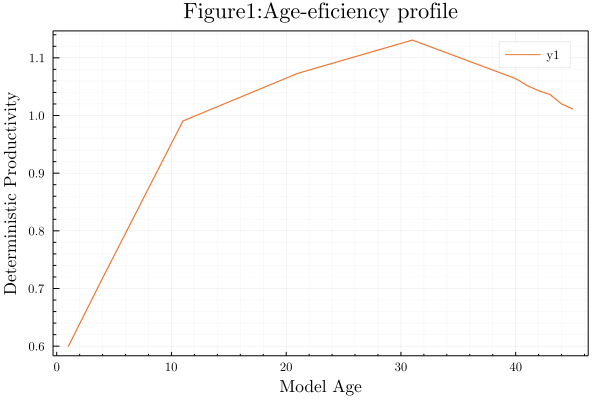

In [5]:
η = readdlm("./PS3/Data/ef.txt")
plot(η, xlabel="Model Age", ylabel="Deterministic Productivity", title="Figure1:Age-eficiency profile")

There is a constant returns to scale production technology $Y=K^{\alpha} L^{1-\alpha}$ with $Y$ - aggregate output, $K-$ aggregate capital stock and $L$ - aggregate effective labor supply. The capital share, $\alpha$, is $0.36$ and depreciation rate, $\delta$, is $0.06 .$ The labor and capital markets are perfectly competitive.

## Dynamic programming problem
In the first part of the exercise you are asked to solve for the agents optimization problem. Agents face the interest rate, $r$, the wage, $w$, and the social security benefit, $b$, which they take as given. For now, just assume that $w=1.05, r=0.05$ and $b=0.2 .$ We will see below, how these variables are determined in a general equilibrium.

We can solve for the dynamic programming problem of the agents by starting in the last period of their life $(j=N)$ and iterating backwards until $j=1 .$ The dynamic programming problem of a retired agent reads:
$$
V_{j}(a)=\max _{a^{\prime} \geq 0}\left\{u^{R}\left((1+r) a+b-a^{\prime}\right)+\beta V_{j+1}\left(a^{\prime}\right)\right\}
$$
with $V_{N+1}(a)=0$ for all $a .$ In the expression above, $V_{j}$ stands for the value function of agent at age $j . \mathrm{A}$ prime denotes tomorrow's variables. The discount factor $\beta=0.97 .$ Observe that we have plugged in agent's budget constraint into the utility function. To solve this problem on the computer, we tabulate the value function, $V(a)$, in a finite number $n_{a}$ of points. The maximization over $a^{\prime}$ then occurs over the values in the set $\left\{a^{1}, a^{2}, \ldots, a^{n_{a}}\right\}$ with $a^{1}=0$ (which means that we rule out borrowing). Note that in the very last period, the value function, $V_{N}(a)$, is given by $(1)$ with $c=(1+r) a+b .$ For a given table of values for $V_{j+1}\left(a^{\prime}\right)$ on the capital grid, retired agent's saving at age $j$ can be found by choosing $a^{\prime}$, which gives the largest value for the right-hand side of (2) given $a$, which we store as $a_{j}^{\prime}(a)$
The dynamic programming problem of a worker is given by:
$$
V_{j}(a, z)=\max _{a^{\prime} \geq 0,0 \leq l \leq 1}\left\{u^{W}\left(w(1-\theta) e\left(z, \eta_{j}\right) l+(1+r) a-a^{\prime}, l\right)+\beta \mathbb{E}\left[V_{j+1}\left(a^{\prime}, z^{\prime}\right) \mid(a, z, j)\right]\right\}
$$
subject to $0 \leq l \leq 1 .$ The social security tax rate $\theta$ is 0.11. The dynamic programming problem of a worker involves maximization over an additional control, which is labor, $l .$ We can, however, make use of the household's first-order condition with respect to $l$ combined with the budget constraint to arrive at the following expression for $l$ (derive it!):
$$
l=\frac{\gamma(1-\theta) e\left(z, \eta_{j}\right) w-(1-\gamma)\left[(1+r) a-a^{\prime}\right]}{(1-\theta) w e\left(z, \eta_{j}\right)}
$$
Thus, for a given combination of $\left(z, a, a^{\prime}\right)$, the expression above gives the optimal solution for labor. Then, for a given table of values for $V_{j+1}\left(a^{\prime}, z^{\prime}\right)$, worker's saving at age $j$ can be found by choosing $a^{\prime}$, which gives the largest value for the right-hand side of (3) given $a$ and $z$, which we store as $a_{j}^{\prime}(a, z) .$ We store the corresponding optimal labor supply as $l_{j}(a, z)$

## Exercise 1
Solve the dynamic programming problem of retirees and workers. Plot the value function over $a$ for a retired agent at the model-age 50 . Is it increasing and concave? Plot the savings function for a worker at the model-age $20, a_{20}^{\prime}(z, a) .$ Is saving increasing in $a ?$ Is it increasing in $z ?$

In [14]:
# Initialize the model
prim, res = Initialize();

In [15]:
# Solving the value function for a predetermined values of r, w, and b
@time begin
        V_ret(prim, res)
        V_workers(prim, res)
end

  2.328900 seconds (1.04 M allocations: 365.991 MiB, 2.10% gc time, 22.68% compilation time)


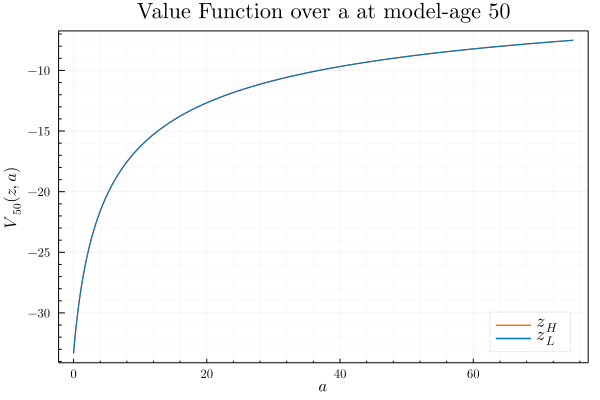

In [16]:
plot( prim.a_grid, res.val_fun[:,1,50], label = L"z_H", legend = :bottomright, legendfontsize=12)
plot!(prim.a_grid ,res.val_fun[:,2,50], label = L"z_L")
xlabel!(L"a")
ylabel!(L"V_{50}(z,a)")
title!("Value Function over a at model-age 50")

In [17]:
# Calculate savings
savings = res.pol_fun[:,:,:] .- prim.a_grid;

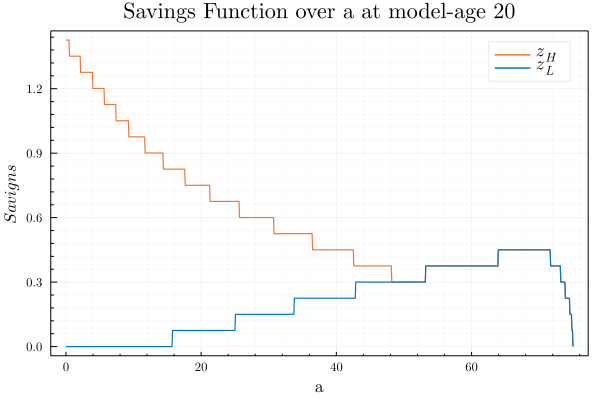

In [18]:
plot( prim.a_grid, savings[:,1,20], label = L"z_H",  legendfontsize=12)
plot!(prim.a_grid ,savings[:,2,20], label = L"z_L")
xlabel!("a")
ylabel!(L"Savigns")
title!("Savings Function over a at model-age 20")

## Exercise 2
Exercise 2
After solving for agent's dynamic programming problem, solve for the steady-state distribution of agents over age, productivity and asset holdings, $F_{j}(z, a)$. Find first the relative sizes of each cohort of age $j$ (denoted by $\mu_{j}$ ) using the expression below:
$$
\mu_{i+1}=\frac{\mu_{i}}{1+n}, \text { for } i=1, \ldots, N-1
$$

with any $\mu_{1}=\tilde{\mu}_{1}>0 .$ Then normalize $\mu$, so that it sums up to 1 across all age groups. Finally, start with the newborn generation with zero wealth: given its distribution, $F_{1}\left(z^{H}, 0\right)=\mu_{1} \times 0.2037$ and $F_{1}\left(z^{L}, 0\right)=$ $\mu_{1} \times 0.7963$, compute the distribution of agents over asset holdings at subsequent ages by applying the optimal decision rules.

In [19]:
SteadyStateDist(prim, res);

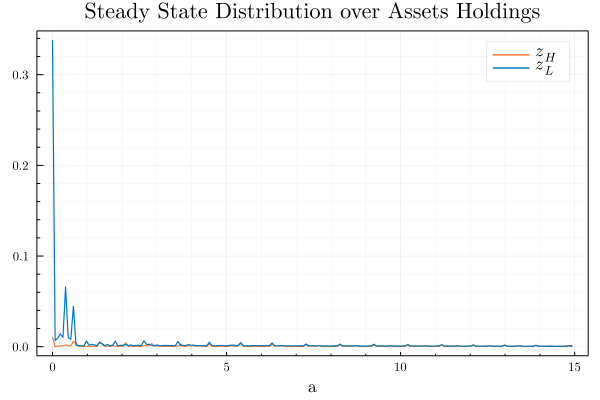

In [20]:
agg_dist_assets = sum(res.F, dims = 3)

plot( prim.a_grid[1:200], agg_dist_assets[1:200,1], label = L"z_H",  legendfontsize=12)
plot!(prim.a_grid[1:200] ,agg_dist_assets[1:200,2], label = L"z_L")
xlabel!("a")
title!("Steady State Distribution over Assets Holdings")

## Exercise 3
We have computed the decision rules and the stationary distribution for given prices. There is no guarantee that at these prices the supply of assets and labor by the agents equals the demand for capital and labor by the firms. In order to find the equilibrium prices, we use the "guess and verify" method. First, we make initial guesses on aggregate capital and aggregate labor, demanded by the firm, which we denote $K^{0}$ and $L^{0}$, respectively. They imply the interest rate $r^{0}$ and wage $w^{0}$, since markets are perfectly competitive. Observe that from the guess on $K$ and $L$ we can compute the pension benefit, $b$, using the government bud get constraint:
$$
b=\frac{\theta w^{0} L^{0}}{\sum_{j=J^{R}}^{N} \mu_{j}}
$$
Given $r^{0}$ and $w^{0}$, we compute the optimal decision rules and the stationary distribution (you have already done that!). Finally, we verify, if our guess was correct by computing the aggregate assets and labor supplied by households:
$$
\begin{align*}
K^{n e w}&=\sum_{j=1}^{N} \sum_{m=1}^{n_{a}} \sum_{z \in\left\{z^{L}, z^{H}\right\}} F_{j}\left(z, a_{m}\right) a_{m} \\ &\text { and } \\ L^{n e w}&=\sum_{j=1}^{J^{R}-1} \sum_{m=1}^{n_{a}} \sum_{z \in\left\{z^{L}, z^{H}\right\}} F_{j}\left(z, a_{m}\right) e\left(z, \eta_{j}\right) l_{j}\left(z, a_{m}\right)
\end{align*}
$$
If the guess was "far off" the obtained values, we update our initial guess with $K^{1}=0.99 K^{0}+0.01 K^{\text {new }}$ and $L^{1}=0.99 L^{0}+0.01 L^{\text {new }}$ and repeat the procedure. We proceed so until the guess and the updated values for $K$ and $L$ are "sufficiently close"

In [22]:
@time out_prim, out_res = MarketClearing();

5 iterations; err = 0.5394334771984544, K = 4.1858, L = 0.4313, λ = 0.7
10 iterations; err = 0.11596256785659653, K = 3.8086, L = 0.363, λ = 0.7
15 iterations; err = 0.04504841541193283, K = 3.768, L = 0.3568, λ = 0.9
20 iterations; err = 0.026741048728627703, K = 3.7513, L = 0.3543, λ = 0.9
25 iterations; err = 0.015107088709138239, K = 3.7428, L = 0.3531, λ = 0.975
30 iterations; err = 0.01351941782391064, K = 3.741, L = 0.3528, λ = 0.975
35 iterations; err = 0.012179245140016892, K = 3.7394, L = 0.3526, λ = 0.975
40 iterations; err = 0.010824511939603543, K = 3.738, L = 0.3524, λ = 0.975
110.870944 seconds (85.36 M allocations: 58.421 GiB, 3.02% gc time, 0.36% compilation time)


Next we plot all the figures:

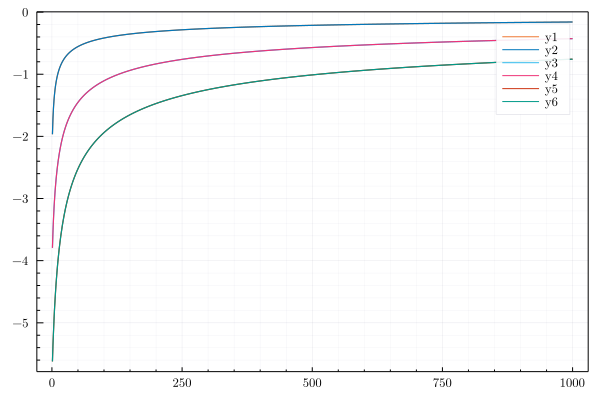

In [23]:
plot(out_res.val_fun[:,:, end])
plot!(out_res.val_fun[:,:, end-1])
plot!(out_res.val_fun[:,:, end-2])

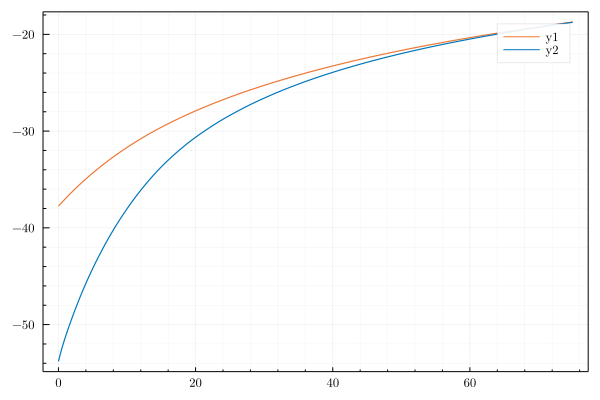

In [24]:
plot(out_prim.a_grid, out_res.val_fun[:, 1, end])
plot!(out_prim.a_grid, out_res.val_fun[:, 2, end])
plot(out_prim.a_grid, out_res.val_fun[:, 1, 20])
plot!(out_prim.a_grid, out_res.val_fun[:, 2,20])

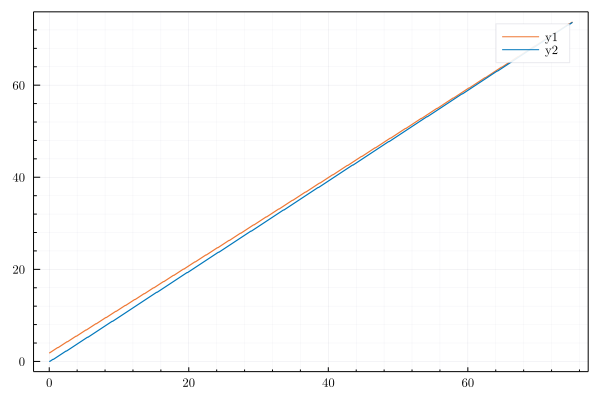

In [25]:
plot(out_prim.a_grid, out_res.pol_fun[:,1,20])
plot!(out_prim.a_grid,out_res.pol_fun[:,2,20])

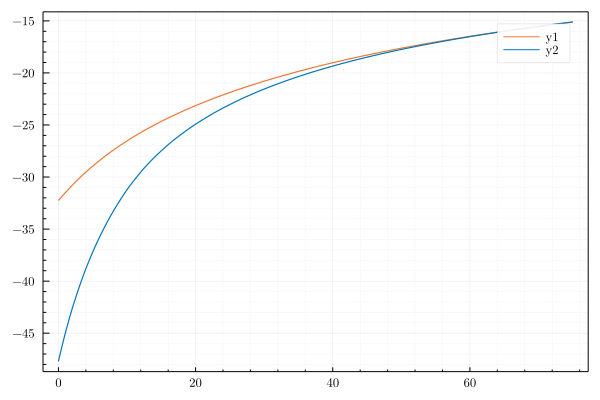

In [26]:
plot(out_prim.a_grid, out_res.val_fun[:, 1, 34])
plot!(out_prim.a_grid, out_res.val_fun[:, 2, 34])

In [27]:
# Calculate savings
savings = out_res.pol_fun[:,:,:] .- out_prim.a_grid;

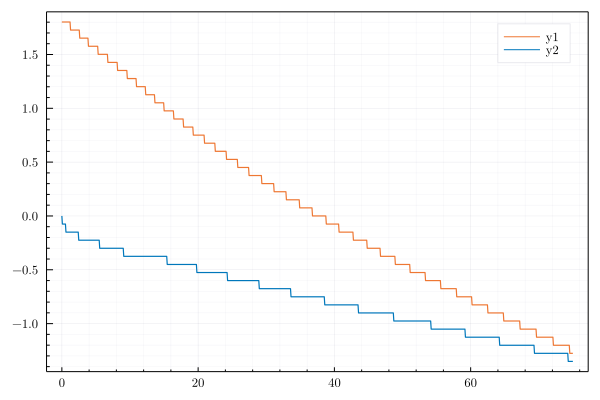

In [28]:
plot(out_prim.a_grid, savings[:,1,20])
plot!(out_prim.a_grid, savings[:,2,20])

In [29]:
#Plotting Policy Functions
    #Find a_hat (The asset point beyond which everyone dissaves)
    function Find_a_hat()
        a_hat=zeros(out_prim.nZ, out_prim.N_final)
        for zi=1:out_prim.nZ, ni=1:out_prim.N_final
            for ai=1:out_prim.nA
                if out_res.pol_fun[ai,zi,ni]<=out_prim.a_grid[ai]
                    a_hat[zi,ni]=out_prim.a_grid[ai]
                    break
                end
            end
        end
        return a_hat
    end

Find_a_hat (generic function with 1 method)

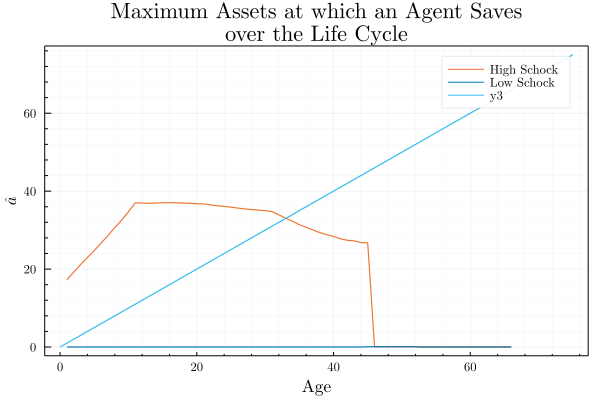

In [30]:
a_hat=Find_a_hat()
    plot(out_prim.a_grid, out_res.pol_fun[:,1,20])
    plot!(out_prim.a_grid, out_res.pol_fun[:,2,20])
    vline!([a_hat[1,20]], label=L"\hat{a}")

    plot(1:out_prim.N_final,a_hat[1,:],
        xlabel="Age", ylabel=L"\hat{a}",label="High Schock")
    plot!(1:out_prim.N_final,a_hat[2,:], title="Maximum Assets at which an Agent Saves
over the Life Cycle",
        xlabel="Age", ylabel=L"\hat{a}",label="Low Schock")

plot!(out_prim.a_grid, out_prim.a_grid)

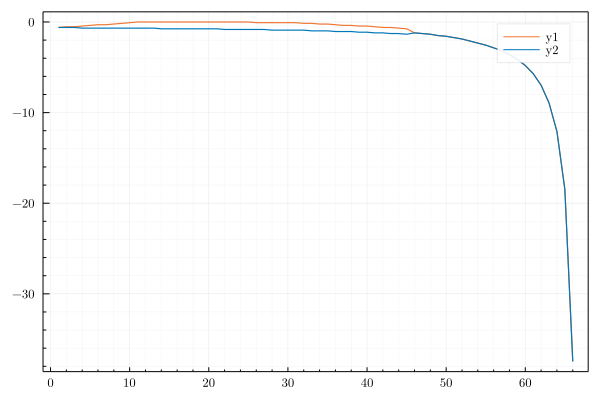

In [31]:
plot(savings[500,1,:])
plot!(savings[500,2,:])

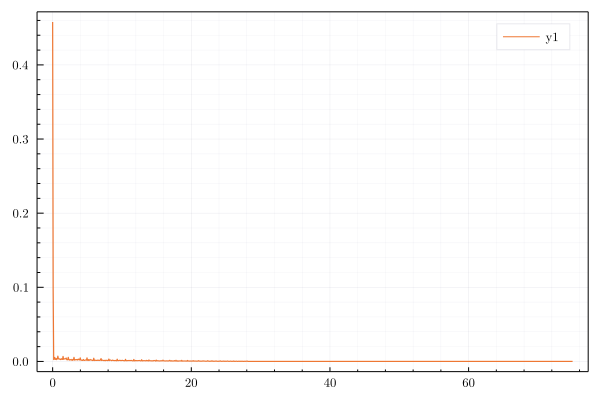

In [32]:
# accross assets for workers and retirees
a_dist = sum(out_res.F, dims = 2:3)
plot(out_prim.a_grid, a_dist[:, 1, 1])

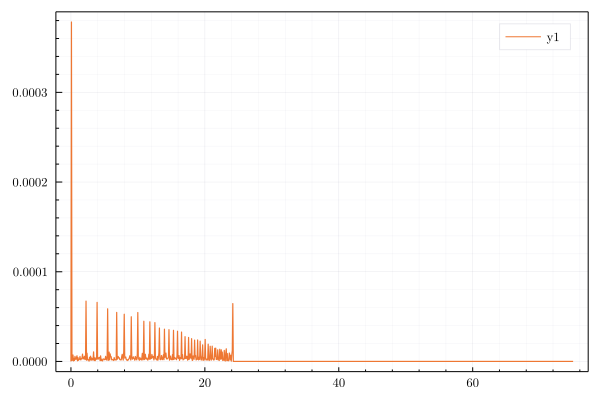

In [33]:
plot(out_prim.a_grid,out_res.F[:,1,50])

You are now asked to evaluate the macroeconomic consequences of eliminating social security.
1. First, solve for the benchmark model with social security. Is this economy dynamically efficient (compare the interest rate with the implicit return from social security, which is equal to the population growth rate)? Now eliminate social security by setting $\theta=0 .$ Observe how aggregate capital accumulation and labor supply change as a result of the tax reform. Provide intuition in terms of insurance and output efficiency. How does aggregate welfare change? Who benefits and who loses due to this reform? How does the reform affect cross-sectional wealth inequality? You can use table 1 to support your answers.

2. In the second experiment, there is no idiosyncratic risk. Assume that at each age $j, z^{L}=z^{H}=0.5$. First, compute the aggregate variables for the case with social security. How does the aggregate capital stock change relative to the benchmark model? Provide intuition in terms of capital as a buffer stock. Then, eliminate social security. How does the aggregate welfare change? What can you conclude about social security as an insurance device against idiosyncratic risk? Comment on the extent, to which these welfare comparisons across steady states are meaningful or misleading.

3. Consider the case, when labor supply is exogenous $(\gamma=1)$. Compare the distortionary effect of social security on the aggregate labor supply. How does the support for social security change with exogenous labor supply?

In [34]:
# conduct policy experiments
@time prim_noSS, res_noSS               = MarketClearing(use_Fortran=false, tol = 1e-3, ss = false);
@time prim_noRisk, res_noRisk           = MarketClearing(use_Fortran=false, tol = 1e-2, i_risk = false);
@time prim_noRisk_noSS, res_noRisk_noSS = MarketClearing(use_Fortran=false, tol = 1e-2, ss = false, i_risk = false);
@time prim_exLab, res_exLab             = MarketClearing(use_Fortran=false, tol = 1e-3, exog_l = true);
@time prim_exLab_noSS, res_exLab_noSS   = MarketClearing(use_Fortran=false, tol = 1e-3, ss = false, exog_l = true);

5 iterations; err = 0.3249170412950928, K = 5.4802, L = 0.4495, λ = 0.7
10 iterations; err = 0.1259157226252814, K = 5.1622, L = 0.3853, λ = 0.7
15 iterations; err = 0.02830045682898419, K = 5.075, L = 0.3752, λ = 0.7
20 iterations; err = 0.006225609718889302, K = 5.0597, L = 0.3737, λ = 0.85
25 iterations; err = 0.0033332917983575072, K = 5.0573, L = 0.3735, λ = 0.9
30 iterations; err = 0.0020096624736831714, K = 5.0561, L = 0.3734, λ = 0.9
35 iterations; err = 0.0015207830648984455, K = 5.0557, L = 0.3733, λ = 0.975
40 iterations; err = 0.0014204433030720054, K = 5.0555, L = 0.3733, λ = 0.975
45 iterations; err = 0.0012572062415534546, K = 5.0554, L = 0.3733, λ = 0.975
50 iterations; err = 0.0011077190050974295, K = 5.0552, L = 0.3733, λ = 0.975
55 iterations; err = 0.0009760064448443018, K = 5.0551, L = 0.3733, λ = 0.975
142.129587 seconds (105.95 M allocations: 72.982 GiB, 2.90% gc time, 0.13% compilation time)
5 iterations; err = 0.7273081034990108, K = 1.719, L = 0.2756, λ = 0.7


And the table: 